In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
T0 = 10.      # initial temperature
Ts = 83.      # temp. of the environment
r = 0.1       # cooling rate
tmax = 10     # max time to run

In [3]:
euler = lambda y, func, dx: y + f*dx 

In [17]:
dt = 2               # horrible dt, but so we have comparisons to high dt
runs = 20            # number of trials to run
delta_ts = []        # stores dt for each iteration
final_temps = []     # stores final temperatures at time tmax

for i in range(runs):
    delta_ts.append( dt )
    nsteps = int(tmax/dt)
    times = np.linspace(dt,tmax,nsteps) 
    temps = np.zeros(nsteps)
    T = T0
    
    for j in range(nsteps):
        T = euler(T, -r*(T-Ts), dt)
        temps[j] = T
    
    final_temps.append( temps[-1] )
    dt /= 2

Text(0.5, 1.0, 'Temperature at 10 s')

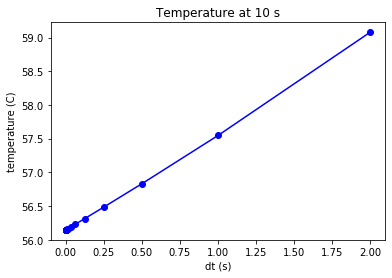

In [18]:
# let's look at the plot
plt.plot( delta_ts, final_temps, "b-o" )
plt.xlabel('dt (s)')
plt.ylabel('temperature (C)')
plt.title("Temperature at 10 s")


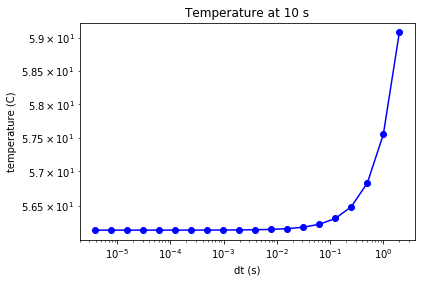

In [6]:
# let's look at that on a log-log scale to space out those points at low dt
plt.plot( delta_ts, final_temps, "b-o" )
plt.xlabel('dt (s)')
plt.ylabel('temperature (C)')
plt.title("Temperature at 10 s")
plt.yscale("log")
plt.xscale("log")

In [20]:
# it seems to be asymptotically approaching a value for temperature at 10 s as dt -> 0, let's see if we can find it
for i in range(len(delta_ts)):
    print( delta_ts[i], "\t:\t", final_temps[i] )

2 	:	 59.07936
1.0 	:	 57.5464738727
0.5 	:	 56.830527664176415
0.25 	:	 56.48403188818471
0.125 	:	 56.31352548456047
0.0625 	:	 56.22894252554225
0.03125 	:	 56.18681676580647
0.015625 	:	 56.16579508880537
0.0078125 	:	 56.15529452282407
0.00390625 	:	 56.15004680445006
0.001953125 	:	 56.14742358597882
0.0009765625 	:	 56.14611213686746
0.00048828125 	:	 56.14545645233595
0.000244140625 	:	 56.14512862007549
0.0001220703125 	:	 56.14496470644685
6.103515625e-05 	:	 56.14488275025737
3.0517578125e-05 	:	 56.14484177232018
1.52587890625e-05 	:	 56.14482128338813
7.62939453125e-06 	:	 56.14481103893189
3.814697265625e-06 	:	 56.14480591670849


In [29]:
# Looks pretty linear, but there may be a slight curve. Let's be quantitative about it.
# Assume fit of the form a*dx^b + c where a, b, and c are constants
f = lambda dx, a, b, c : a*(dx**b)+c
popt, pcov = curve_fit(f, delta_ts, final_temps)
print("a = {} b = {}, c = {}".format(popt[0], popt[1], popt[2]) )

a = 1.4129804111123527 b = 1.0512715094891798, c = 56.146762280647685


ANSWER QUESTIONS

1) Does it converge as Delta t -> 0?<br>
    - It appears to be nearing a value around 56.1448, although even between the last two points, there is a difference of magnitude 10^-5. Even setting runs to 25 (which takes much longer) could only match precision to the first 5 decimal places.
2) If so, does it converge linearly? Quadratically?
    - The trend looks almost linear. Looking at consecutive series of (temp1-temp2)/(dt1-dt2), se see that by the end, they do not change much, but once dt gets higher, the differences are more noticeable. Using scipy's curve_fit function, we see we can fit a function of the form a*dx^b + c to the data with a power of only 1.05 on the dx. This is very close to a linear convergence

In [8]:
# using dt = 2/(2^14)
# exact solution to this ODE is T(t) = (T0 - Ts + Ts*exp(r*t)) * exp(-r*t)
dt = 2/2**14
T_exact = lambda t : ( T0 - Ts + Ts*np.exp( r*t ) ) * np.exp(-r*t)

In [9]:
nsteps = int(tmax/dt)
times = np.linspace(dt,tmax,nsteps) 
num_temps = np.zeros(nsteps)            # numerical solutions to temperature, fill in in the loop later
ex_temps = T_exact(times)               # exact solutions to temperature
T = T0

# fill in the numerical solutions
for i in range(nsteps):
    T = euler(T, -r*(T-Ts), dt)
    num_temps[i] = T

diffs = num_temps - ex_temps

Text(0, 0.5, 'numerical - exact result (degrees C)')

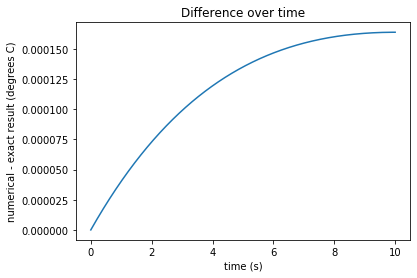

In [12]:
plt.plot(times, diffs)
plt.title("Difference over time")
plt.xlabel("time (s)")
plt.ylabel("numerical - exact result (degrees C)")

In [11]:
diffs[-10:]

array([0.00016391, 0.00016391, 0.00016391, 0.00016391, 0.00016391,
       0.00016391, 0.00016391, 0.00016391, 0.00016391, 0.00016391])

As we can see, the error does grow with time, although it seems to flatten out at an error of around 1.64e-4 as seen in that at least the last 10 elements of the difference array are identical (to displayed precision). The asymptote makes sense as even if there are flaws in the numerical solution, the derivative lessens each time, meaning both the numerical and exact solutions should converge to some final (although not the same value)